# Airbnb Property Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
listings = pd.read_csv(r'data\boston-airbnb-open-data\listings.csv')

calendar = pd.read_csv(r'data\boston-airbnb-open-data\calendar.csv')



In [3]:
property_type_list = listings['property_type'].unique().tolist()
property_type_list = [x for x in property_type_list if str(x) != 'nan']

only_propertyType_DF = pd.DataFrame()
only_propertyType_DF['property_type'] = listings['property_type']
only_propertyType_DF['room_type'] = listings['room_type']

propertyDF = pd.DataFrame()
#DataFrame({'count' : df1.groupby( [ "Name", "City"] ).size()}).reset_index()

propertyDF['room_type'] = only_propertyType_DF.groupby( [ 'property_type', 'room_type'] ).size()
#propertyDF['count'] = only_propertyType_DF.groupby(['property_type', 'room_type']).count()

#propertyDF = pd.DataFrame(columns = ('property_type', 'Private room', 'Entire home/apt', 'Shared room'))

#tempDict = {}

#for property_type in property_type_list:
    #tempDict[property_type] = {}

#for property_type in property_type_list:
    #temp_list = listings[listings['property_type'] == property_type]['room_type'].unique()
    #for room_type in temp_list:
        #total = listings[(listings['property_type'] == property_type) & (listings['room_type'] == room_type)].value_counts()
        #tempDict[property_type][room_type] = total


#print(type(property_type_list))


propertyDF = propertyDF.unstack(level=-1)
propertyDF = propertyDF.xs('room_type', axis=1, drop_level=True)
propertyDF = propertyDF.reset_index()
propertyDF.rename(columns={'Entire home/apt': 'entire_home', 'Private room': 'private_room', 'Shared room': 'shared_room'}, inplace=True)
print(propertyDF)
propertyDF['count'] = propertyDF.sum(axis=1)

propertyDF = propertyDF[propertyDF['count'] > 10]
print(propertyDF)


room_type    property_type  entire_home  private_room  shared_room
0                Apartment       1764.0         786.0         62.0
1          Bed & Breakfast          2.0          38.0          1.0
2                     Boat         10.0           2.0          NaN
3                Camper/RV          1.0           NaN          NaN
4              Condominium        150.0          79.0          2.0
5                     Dorm          NaN           2.0          NaN
6             Entire Floor          2.0           2.0          NaN
7               Guesthouse          1.0           NaN          NaN
8                    House        148.0         405.0          9.0
9                     Loft         29.0           8.0          2.0
10                   Other          2.0          11.0          4.0
11               Townhouse         14.0          40.0          NaN
12                   Villa          2.0           4.0          NaN
room_type    property_type  entire_home  private_room  shared_

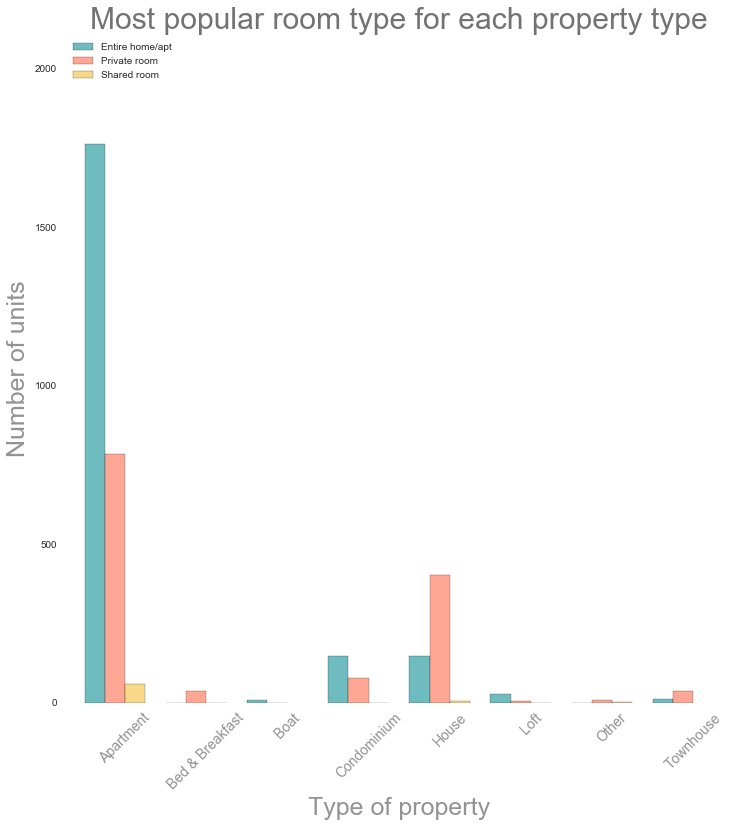

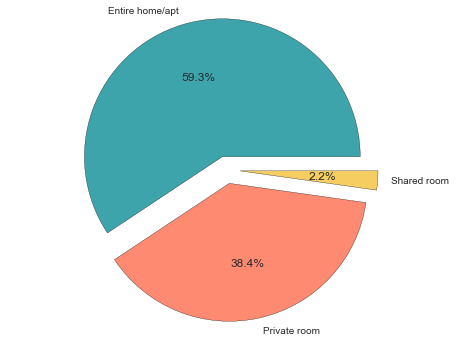

In [4]:
# Setting the positions and width for the bars
pos = list(range(len(propertyDF['entire_home'])))
width = 0.25

# Plotting the bars
fig = plt.figure(1, figsize=(12,12))
ax = fig.add_subplot(111)
ax.grid(False)
ax.set_frame_on(False)

# Create a bar with entire_home data
rect1 = plt.bar(pos,
        propertyDF['entire_home'],
        width,
        alpha=0.75,
        color='#3DA4AB',
        label=propertyDF['property_type'][0])

# Create a bar with private_room data
rect2 = plt.bar([p + width for p in pos],
        propertyDF['private_room'],
        width,
        alpha=0.75,
        color='#FE8A71',
        label=propertyDF['property_type'][1])

# Create a bar with shared_room data
rect3 = plt.bar([p + width*2 for p in pos],
        propertyDF['shared_room'],
        width,
        alpha=0.75,
        color='#F6CD61',
        label=propertyDF['property_type'][2])

# Set the y axis label
ax.set_ylabel('Number of units', 
              fontsize=25, 
              alpha=0.5)

ax.set_xlabel('Type of property', 
              fontsize=25, 
              alpha=0.5)

# Set the chart's title
ax.set_title('Most popular room type for each property type', 
             fontsize=30, 
             alpha=0.65)

plt.subplots_adjust(top=0.9)

# Set the position of the x ticks
ax.set_xticks([p + 2 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(propertyDF['property_type'], 
                   rotation=45, 
                   fontsize=14, 
                   alpha=0.5)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)

plt.ylim([0, 
          max(propertyDF['entire_home'] + propertyDF['private_room'] + propertyDF['shared_room'])-500
         ])

# Adding the legend and showing the plot
plt.legend(['Entire home/apt', 'Private room', 'Shared room'], loc='upper left')
plt.grid()
plt.show()

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)



# Determining the total distribution of room-type

roomDF = pd.DataFrame()
roomDF['room_type'] = listings['room_type']

sum_of_room = pd.DataFrame()

sum_of_room['sum_room']=roomDF['room_type'].value_counts()

sum_of_room.reset_index(inplace=True)
sum_of_room = sum_of_room.rename(columns = {'index':'room_type'})

room_labels = sum_of_room.room_type.unique().tolist()

room_type_count = pd.DataFrame(sum_of_room.room_type.value_counts())

colors = ['#3DA4AB', '#FE8A71', '#F6CD61']
explode = (0.1,0.1,0.1)

ax3 = fig.add_subplot(221)
plt.pie(sum_of_room.sum_room,
        labels=room_labels, 
        colors=colors,
        explode=explode,
        autopct='%1.1f%%')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch']


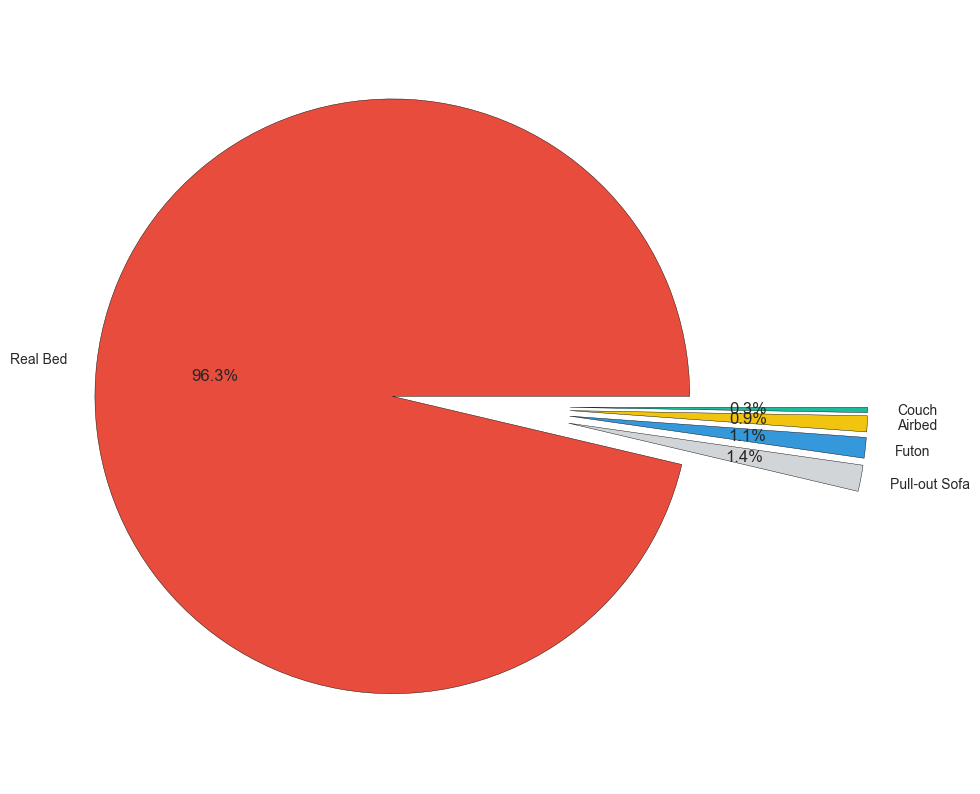

In [15]:
labels = listings.bed_type.unique().tolist()

print(labels)

sizes = pd.DataFrame(listings.bed_type.value_counts())

sizes

colors = ['#E74C3C', '#D1D5D8', '#3498DB', '#F1C40F', '#1ABC9C']
explode = (0.3,0.3,0.3,0.3,0.3)
fig2, ax2 = plt.subplots( figsize=(10,10))
plt.pie(sizes.bed_type,
        labels=labels, 
        colors=colors,
        explode=explode,
        autopct='%1.1f%%')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

In [17]:
#df = pd.read_csv(r'C:\Classroom\FinalExam\boston-airbnb-open-data\listings.csv')



,property_type,sum_property
0,Apartment,2612
1,House,562
2,Condominium,231
3,Townhouse,54
4,Bed & Breakfast,41
5,Loft,39
6,Other,17
7,Boat,12
